In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#xây dựng transformation
def draw_poly(points: np.array):
    poly_closed = np.concatenate([points, points[:1]], axis=0)
    plt.plot(poly_closed[:, 0], poly_closed[:, 1])

def translation(points: np.array, tx: float, ty: float):
    T = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    points_homogeneous = np.concatenate([points, np.ones((points.shape[0], 1))], axis=1)
    points_translated = np.dot(T, points_homogeneous.T).T
    return points_translated[:, :2]

def rotate(points: np.array, theta: float):
    T = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])
    points_homogeneous = np.concatenate([points, np.ones((points.shape[0], 1))], axis=1)
    points_rotated = np.dot(T, points_homogeneous.T).T
    return points_rotated[:, :2]

def scale(points: np.array, sx: float, sy: float) -> np.array:
    T = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])
    points_homogeneous = np.concatenate([points, np.ones((points.shape[0], 1))], axis=1)
    points_scaled = np.dot(T, points_homogeneous.T).T
    return points_scaled[:, :2]

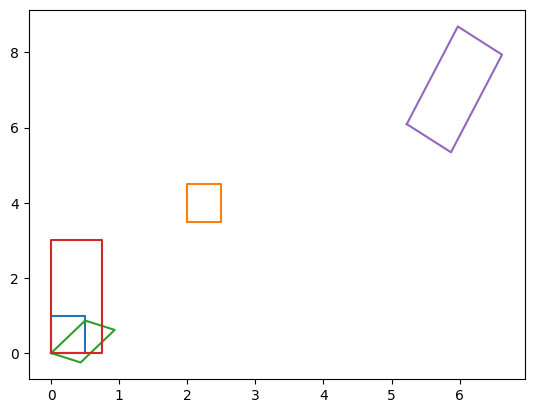

In [4]:
rx, ry = 0.5, 1
tx, ty = 2, 3.5
theta = np.deg2rad(-30)
sx, sy = 1.5, 3

rec_points = np.array([[0, 0], [0, ry], [rx, ry], [rx, 0]])

trans_rec = translation(rec_points, tx, ty)
rotated_rec = rotate(rec_points, theta)
scale_rec = scale(rec_points, sx, sy)
similarity_rec = scale(rotate(translation(rec_points, tx, ty), theta), sx, sy)

draw_poly(rec_points)
draw_poly(trans_rec)
draw_poly(rotated_rec)
draw_poly(scale_rec)
draw_poly(similarity_rec)